# Exercise 2.3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [1]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [3]:
import matplotlib
matplotlib.__version__

'3.8.4'

In [7]:
df = pd.read_csv('new_york_citibike_2022_data.csv', index_col = 0)

C:\Users\canam\AppData\Local\Temp\ipykernel_6692\4269700933.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('new_york_citibike_2022_data.csv', index_col = 0)


In [9]:
#checking shape of dataframe to make sure 
#it matches what was exported in previous exercise
df.shape

(29838166, 16)

In [11]:
#checking the columns
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [13]:
#dropping the _merge column
df = df.drop(['_merge'], axis=1)

In [16]:
#checking to see if column was dropped
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [18]:
#checking shape of dataframe
df.shape

(29838166, 15)

In [20]:
#checking data types 
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [22]:
#changing date format to datetime format
df['date'] = pd.to_datetime(df['date'])

In [24]:
#checking to see that it has been changed
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

## Plotting with pandas

In [27]:
#creating dataframe with date as the index
df_temp = df.set_index('date')

In [29]:
#checking to see if date is now the index
df_temp.head()

ride_id  rideable_type               started_at  \
date                                                                   
2022-01-21  BFD29218AB271154  electric_bike  2022-01-21 13:13:43.392   
2022-01-10  7C953F2FD7BE1302   classic_bike  2022-01-10 11:30:54.162   
2022-01-26  95893ABD40CED4B8  electric_bike  2022-01-26 10:52:43.096   
2022-01-03  F853B50772137378   classic_bike  2022-01-03 08:35:48.247   
2022-01-22  7590ADF834797B4B   classic_bike  2022-01-22 14:14:23.043   

                           ended_at       start_station_name start_station_id  \
date                                                                            
2022-01-21  2022-01-21 13:22:31.463  West End Ave & W 107 St          7650.05   
2022-01-10  2022-01-10 11:41:43.422             4 Ave & 3 St          4028.04   
2022-01-26  2022-01-26 11:06:35.227          1 Ave & E 62 St          6753.08   
2022-01-03  2022-01-03 09:10:50.475          2 Ave & E 96 St          7338.02   
2022-01-22  2022-01-22 14:34:57.474          6 Ave & W 34 St           6364.1   

                       end_station_name end_station_id  start_lat  start_lng  \
date                                                                           
2022-01-21  Mt Morris Park W & W 120 St        7685.14  40.802117 -73.968181   
2022-01-10      Boerum Pl\t& Pacific St        4488.09  40.673746 -73.985649   
2022-01-26              5 Ave & E 29 St        6248.06  40.761227 -73.960940   
2022-01-03              5 Ave & E 29 St        6248.06  40.783964 -73.947167   
2022-01-22              5 Ave & E 29 St        6248.06  40.749640 -73.988050   

              end_lat    end_lng member_casual  avgTemp  
date                                                     
2022-01-21  40.804038 -73.945925        member     -6.0  
2022-01-10  40.688489 -73.991160        member      1.6  
2022-01-26  40.745168 -73.986831        member     -2.3  
2022-01-03  40.745168 -73.986831        member      1.4  
2022-01-22  40.745168 -73.986831        member     -5.9

In [31]:
df_temp = df_temp.sort_index()

<Axes: xlabel='date'>

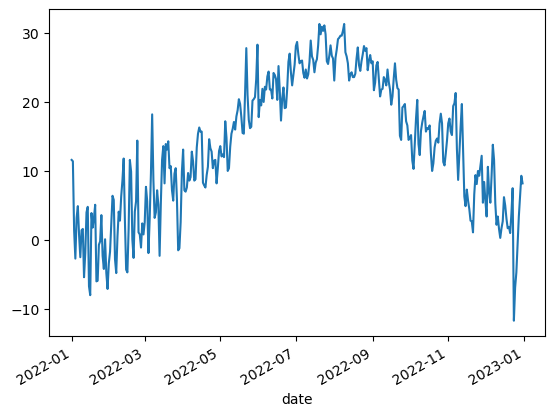

In [33]:
df_temp['avgTemp'].plot()

## Aggregate trips 

In [35]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [37]:
# grouping by the count of the trips
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [39]:
df_group.head()

date  ride_id
0 2022-01-01    20428
1 2022-01-02    43009
2 2022-01-03    33189
3 2022-01-04    36842
4 2022-01-05    34230

In [41]:
#renaming ride_id column
df_group.rename(columns = {'ride_id':'daily_bike_rides'}, inplace = True)

In [43]:
df_group.head()

date  daily_bike_rides
0 2022-01-01             20428
1 2022-01-02             43009
2 2022-01-03             33189
3 2022-01-04             36842
4 2022-01-05             34230

In [65]:
#creating a subsample of weather data because it is too large
df_subsample = df.sample(frac=.2)

In [67]:
#merging subsample of weather data with daily_bike_rides_data
df_2 = df_subsample.merge(df_group, on = "date", how = 'outer', indicator = True)
#checking to see if merge was successful
print(df_2['_merge'].value_counts(dropna = False))

_merge
both          5967633
left_only           0
right_only          0
Name: count, dtype: int64


In [69]:
#creating a new dataframe with date as the index
df_temp = df_2.set_index('date')

In [73]:
df_temp.head()

ride_id  rideable_type               started_at  \
date                                                                   
2022-01-01  5C0A52C41FDB0F87  electric_bike  2022-01-01 12:49:17.678   
2022-01-01  90FE77B2515A37BC  electric_bike  2022-01-01 19:44:06.209   
2022-01-01  A042B97C662834CB   classic_bike  2022-01-01 15:48:53.604   
2022-01-01  462ACF359A77E71D   classic_bike  2022-01-01 02:00:00.789   
2022-01-01  BEB3D75630B3E518  electric_bike  2022-01-01 14:28:13.568   

                           ended_at         start_station_name  \
date                                                             
2022-01-01  2022-01-01 12:51:57.282             Ave D & E 8 St   
2022-01-01  2022-01-01 20:03:57.539            W 20 St & 7 Ave   
2022-01-01  2022-01-01 16:16:55.822    Bank St & Washington St   
2022-01-01  2022-01-01 02:25:32.284  DeKalb Ave & Franklin Ave   
2022-01-01  2022-01-01 14:37:28.577    E 53 St & Lexington Ave   

           start_station_id        end_station_name end_station_id  start_lat  \
date                                                                            
2022-01-01           5506.1       Avenue D & E 3 St        5436.09  40.723684   
2022-01-01          6182.02         W 20 St & 7 Ave        6182.02  40.742388   
2022-01-01          5964.01  West End Ave & W 60 St        7059.08  40.736197   
2022-01-01          4528.01     Grove St & Broadway        4526.01  40.690648   
2022-01-01          6617.09         W 41 St & 8 Ave        6602.03  40.758281   

            start_lng    end_lat    end_lng member_casual  avgTemp  \
date                                                                 
2022-01-01 -73.975748  40.720828 -73.977932        member     11.6   
2022-01-01 -73.997262  40.742388 -73.997262        member     11.6   
2022-01-01 -74.008592  40.772370 -73.990050        member     11.6   
2022-01-01 -73.957462  40.690470 -73.923511        casual     11.6   
2022-01-01 -73.970694  40.756405 -73.990026        member     11.6   

            daily_bike_rides _merge  
date                                 
2022-01-01             20428   both  
2022-01-01             20428   both  
2022-01-01             20428   both  
2022-01-01             20428   both  
2022-01-01             20428   both

## Plotting bike trips and temperatures on a dual axis

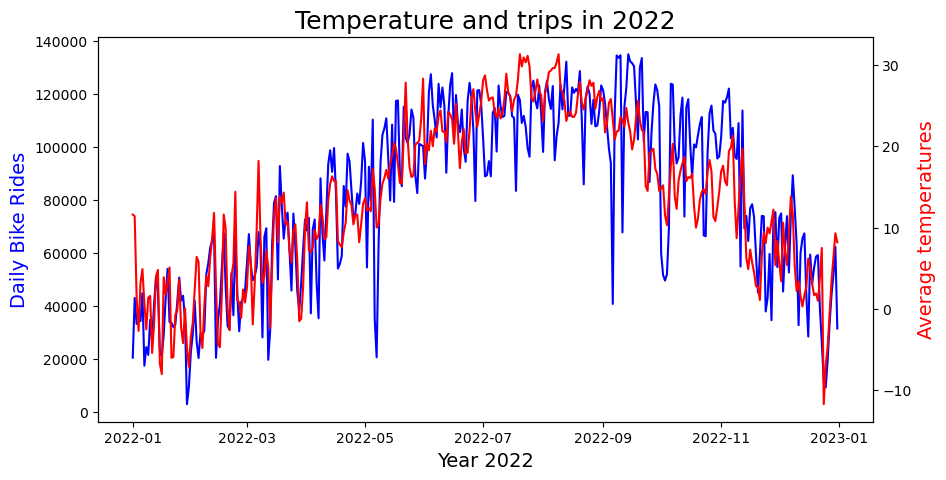

In [75]:
# Creating figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Making a plot of the bike rides
ax.plot(df_temp['daily_bike_rides'],color = "blue")
ax.set_xlabel("Year 2022", fontsize = 14) # setting x-axis label
ax.set_ylabel("Daily Bike Rides",color = "blue", fontsize = 14) # setting y-axis label

#creating the dual axis - initializing a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Making a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

I used the object-oriented approach to make this chart.  First, I created the objects fig (figure/container) and ax (axes) as subplots to the chart.  Then I defined the first plot (daily_bike_rides), set the x-axis to "Year 2022", and set the y-axis to "Daily Bike Rides."  The next step was to define the second plot (avgTemp) but because daily_bike_rides and avgTemp have different scales, I needed to first create a twin axis.  This would put avg_Temp on the same chart as the daily_bike_rides but with its own scale on the other y-axis.  After I created the twin axis, I defined the second plot (avgTemp) and all that was left to do was label the other y-axis to "Average Temperatures" and create a title for the chart.         